In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from __future__ import print_function

Will try and get an mjj distribution that looks something like this:

<img src="Capture.PNG">

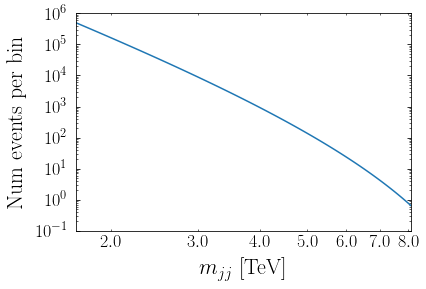

In [2]:
def dNbydM(m,p0,p1,p2):
    return p0*(1-(m/13))**p1/(m/13)**p2

p0 = 0.5*10**1
p1 = 5.
p2 = 6.
x = np.arange(1.7,8.11,0.1)
y = [dNbydM(m,p0,p1,p2) for m in x]
plt.plot(x,y)
plt.semilogy()
plt.semilogx()
plt.xlabel(r"$m_{jj}$  [TeV]")
plt.ylabel("Num events per bin")
plt.xlim([1.7,8.1])
plt.ylim([10**-1,10**6])
ax=plt.gca()
ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.yticks(np.logspace(-1,6,8))
plt.show()

Define bins to be the same (at least roughly) as ATLAS dijets, then restrict to narrower mass range.

In [3]:
bin_boundaries = np.logspace(np.log10(1.7),np.log10(8.1),67)
bin_boundaries = bin_boundaries[7:-20]
bin_midpoints = np.array([(bin_boundaries[i+1] + bin_boundaries[i])/2 for i in range(len(bin_boundaries)-1)])
bin_widths = np.array([bin_boundaries[i+1] - bin_boundaries[i] for i in range(len(bin_boundaries)-1)])

Generate bg events

In [4]:
bg_bincounts = [np.random.poisson(dNbydM(m,p0,p1,p2)) for m in bin_midpoints]
ndim=2
bgevents = [np.clip(np.random.normal(0,1,(bincount,ndim)),-4,4) for bincount in bg_bincounts]

Generate signal rates as gaussian in mJJ

In [5]:
signal_distribution = np.random.normal(2.97,0.06,150)
signal_bincounts = np.histogram(signal_distribution,bins=bin_boundaries)[0]
signal_bincounts

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 32, 64,
       45,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

Check S/B and S/sqrt(B) around signal peak

In [6]:
print("Signal events =",signal_bincounts[14:19])
print("BG events =",bg_bincounts[14:19])
print("S/sqrt(B) =",signal_bincounts[14:19]/np.sqrt(bg_bincounts[14:19]))
print("S/B =",signal_bincounts[14:19]/bg_bincounts[14:19])
print("S/sqrt(B) in signal region =",np.sum(signal_bincounts[15:18])/np.sqrt(np.sum(bg_bincounts[15:18])))

Signal events = [ 2 32 64 45  7]
BG events = [13805, 11634, 9671, 8228, 6841]
S/sqrt(B) = [0.01702205 0.29667807 0.65079511 0.4960956  0.08463271]
S/B = [0.00014488 0.00275056 0.00661772 0.00546913 0.00102324]
S/sqrt(B) in signal region = 0.8204749572783697


Generate auxilliary variables for signal events. A narrow Gaussian in a moderately populated region of bg.

In [7]:
signal_center = np.ones(ndim)*1.5
signal_variances = np.ones(ndim)*0.08**2
signal_cov = np.diag(signal_variances)
signalevents = [np.clip(np.random.multivariate_normal(signal_center,
                                                      signal_cov,
                                                      bincount),-4,4)
                for bincount in signal_bincounts]

bg_plus_signal_binned = [np.random.permutation(np.append(signalevents[i],bgevents[i],axis=0)) for i in range(len(signalevents))]

Look at signal and bg auxilliary distributions

Signal + bg:


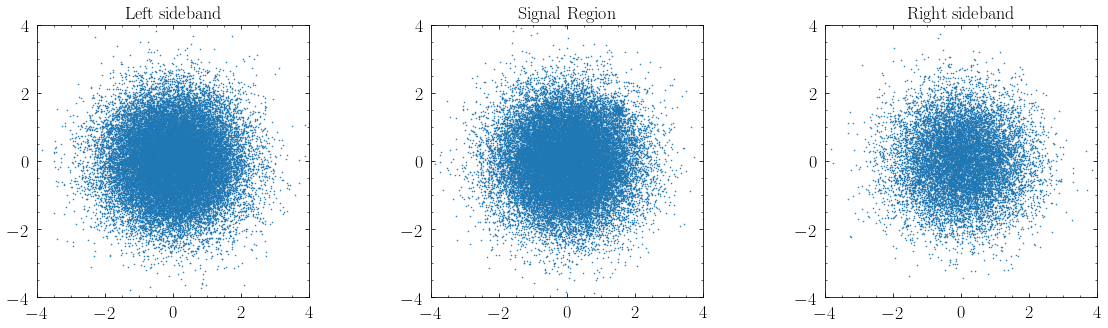

Signal highlighted:


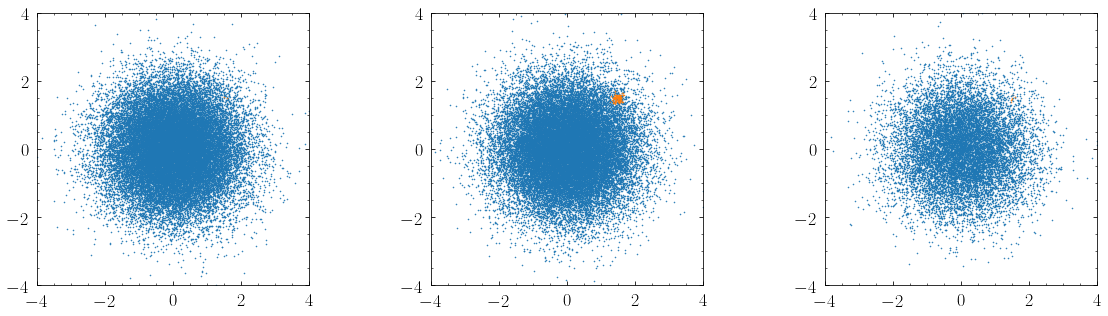

In [8]:
print("Signal + bg:")
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
for bin_i in [13,14]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Left sideband")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 2)
for bin_i in [15,16,17]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Signal Region")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 3)    
for bin_i in [18,19]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C0')
plt.gca().set_aspect(1.)
plt.title("Right sideband")
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

print("Signal highlighted:")
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
for bin_i in [13,14]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 2)
for bin_i in [15,16,17]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.subplot(1, 3, 3)    
for bin_i in [18,19]:
    plt.scatter(bgevents[bin_i][:,0],bgevents[bin_i][:,1],s=0.3,color='C0')
    plt.scatter(signalevents[bin_i][:,0],signalevents[bin_i][:,1],s=0.3,color='C1')
plt.gca().set_aspect(1.)
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

Import modules and set up basic variables

In [13]:
import gc
import math
import time

from sklearn import preprocessing

import keras as keras
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
import tensorflow as tf

from cwola_utils_copy import AddPredictionsToScatter_nestedcrossval
from cwola_utils_copy import model_ensemble
from cwola_utils_copy import check_eff
from cwola_utils_copy import print_scatter_checkpoint

output_prefix = 'CWoLa-Hunting-2D-toy'

kfolds = 4
checkeff = 0.005
patience = 1000
ntries = 1
bin_i=16
axes_list=[[0,1]]
axes_labels=[['x','y']]
preprocess=None
numvars=2
batch_size=2000

rates = np.array([0.5,0.95,0.99,0.998])
colors=['silver','grey','khaki','goldenrod','firebrick']

Do a single training run and show how the NN evolves during training

In [17]:
times = list()


model_utils = model_ensemble(bg_plus_signal_binned, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = checkeff)

i=0
k=0
l=1

print(" k =", k, "l =", l)
#Naming convention for model files.
checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
start = time.time()

data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

print("Now training model ", i + 1, " of ", ntries)

K.clear_session()
#Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

#Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
my_check_eff = check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = patience,
                         min_epoch=50, batch_size=batch_size,
                         plot_period=50,eff_rate = checkeff,
                         plotmode="print",avg_length=20)

#Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                    axes_list = axes_list,
                                    axes_labels = axes_labels,
                                    period=100,
                                    training_data=np.append(data_train,data_valid,axis=0),
                                    training_labels=np.append(labels_train,labels_valid,axis=0),
                                    preprocess=preprocess,
                                   rates=rates,
                                   colors=colors,
                                   mode = "show")

#mycallbacks=[my_print,
#    my_check_eff]
mycallbacks=[]

#Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
#However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
model = Sequential()
model.add(Dense(64, input_dim=numvars,use_bias=True,
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
model.add(keras.layers.LeakyReLU(alpha=0.01))
#model.add(Dropout(0.1))
model.add(Dense(64, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(32, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(16, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(8, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=myoptimizer,
              loss='binary_crossentropy')

model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                       validation_data=(data_valid, labels_valid, weights_valid),
                       callbacks=mycallbacks,verbose=1,
                       sample_weight = weights_train)

del model
K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


model = keras.models.load_model(checkpoint_name + "_best.h5")
model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
plt.close('all')

print("Selected Model:")
model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                            rates=rates,
                                                            colors=colors)

for i in range(5):
    gc.collect()
end = time.time()

times.append(end-start)
print("Elapsed Time = ", times[-1])

 k = 0 l = 1
Now training model  1  of  1
Train on 36318 samples, validate on 18158 samples
Epoch 1/2000
36318/36318 [==============================] - 2s 56us/step - loss: 0.6961 - val_loss: 0.6932
Epoch 2/2000
36318/36318 [==============================] - 2s 42us/step - loss: 0.6939 - val_loss: 0.6937
Epoch 3/2000
36318/36318 [==============================] - 2s 63us/step - loss: 0.6937 - val_loss: 0.6932
Epoch 4/2000
36318/36318 [==============================] - 1s 39us/step - loss: 0.6933 - val_loss: 0.6933
Epoch 5/2000
36318/36318 [==============================] - 1s 26us/step - loss: 0.6932 - val_loss: 0.6933
Epoch 6/2000
36000/36318 [============================>.] - ETA: 0s - loss: 0.6936

KeyboardInterrupt: 

In [12]:
rates

(array([0.5  , 0.95 , 0.99 , 0.998]),)

Run full cross validation procedure, show trained and ensemble classifiers. For each individual classifier, the selection is shown on all training and validation data for that k-fold. After training all the classifiers in an ensemble for a k-fold, the selection of the ensemble classifier is shown on the test k-fold itself.

Starting kfold 0 of 3
Starting lfold 1 of 3
 k = 0 l = 1
Now training model  1  of  1


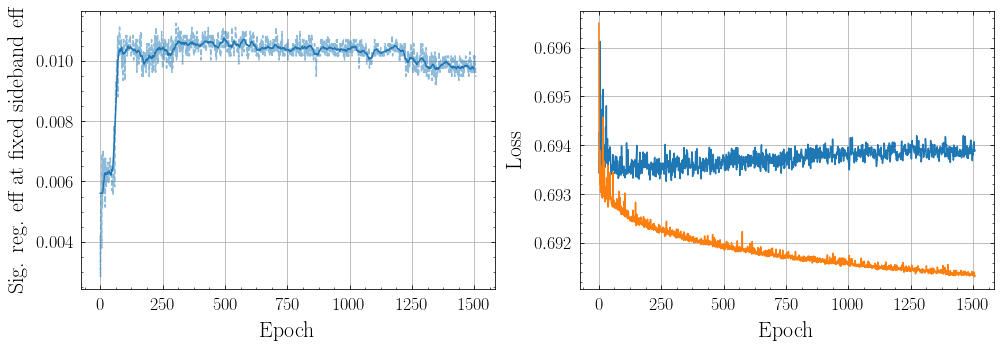

Selected Model:


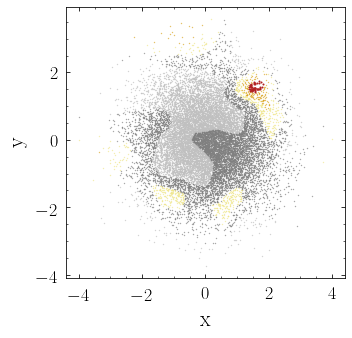

Elapsed Time =  670.3491837978363
Starting lfold 2 of 3
 k = 0 l = 2
Now training model  1  of  1


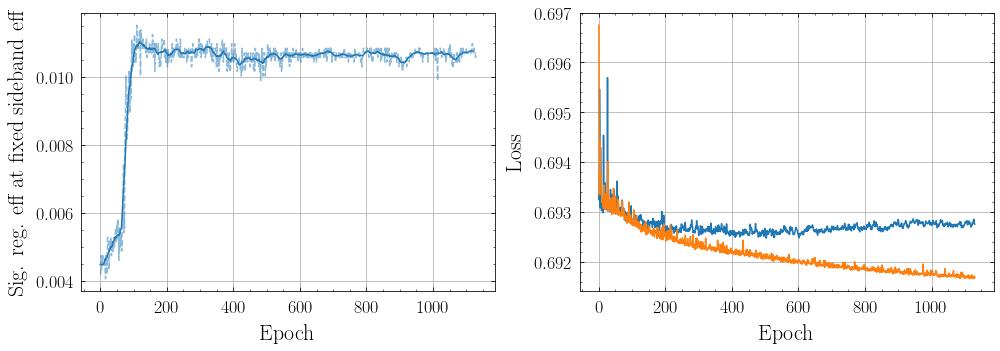

Selected Model:


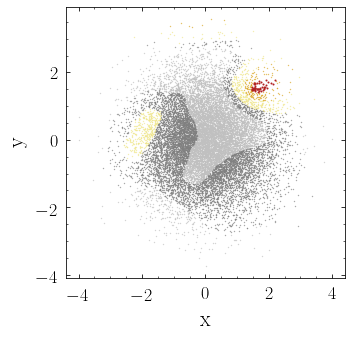

Elapsed Time =  584.4661641120911
Starting lfold 3 of 3
 k = 0 l = 3
Now training model  1  of  1


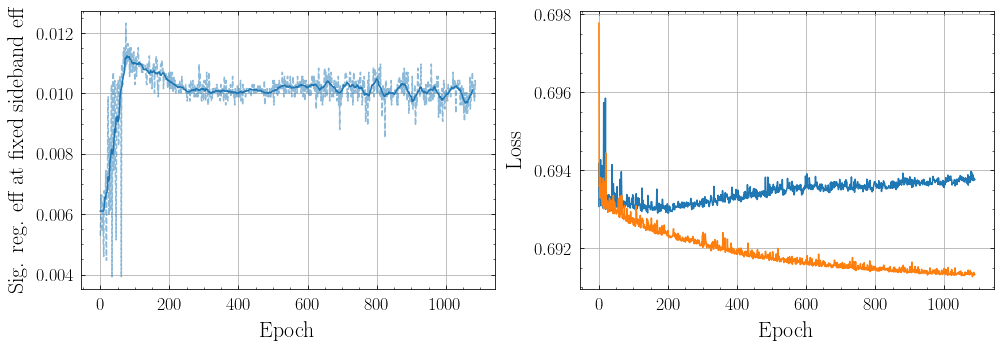

Selected Model:


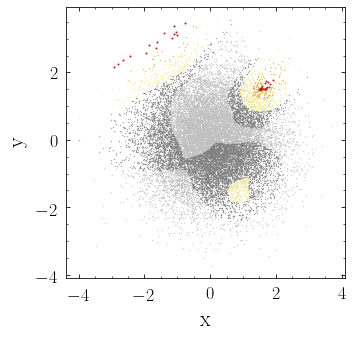

Elapsed Time =  554.6103248596191
Bin =  16
aucs valid:  [[[0.49759062832966355], [0.5092372197037183], [0.5024462595642738]], [[], [], []], [[], [], []], [[], [], []]]
Effs valid:  [[[0.010567673756943452], [0.011111111111111072], [0.010974122747595128]], [[], [], []], [[], [], []], [[], [], []]]
aucs train:  [[[0.5216236706290478], [0.5103357343437414], [0.5131551664137881]], [[], [], []], [[], [], []], [[], [], []]]
Effs train:  [[[0.010636135763159693], [0.010432190760059634], [0.010839374026149984]], [[], [], []], [[], [], []], [[], [], []]]


Ensemble model for k = 0


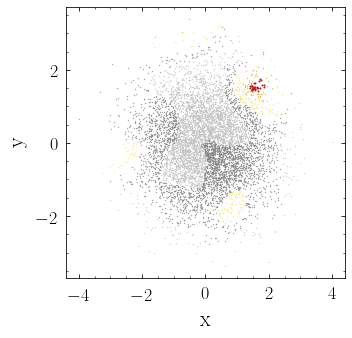

Starting kfold 1 of 3
Starting lfold 0 of 3
 k = 1 l = 0
Now training model  1  of  1


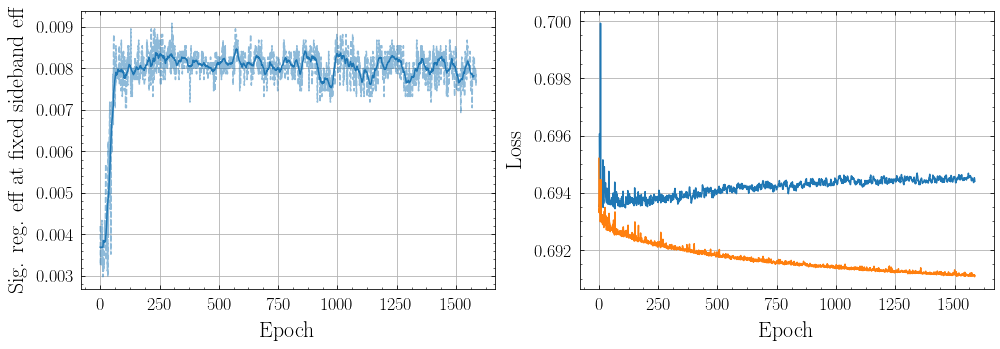

Selected Model:


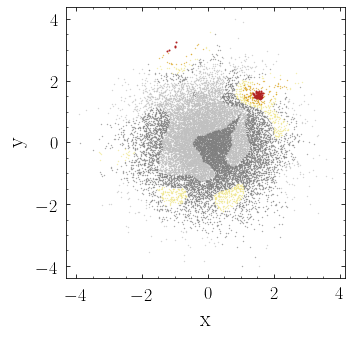

Elapsed Time =  991.0342025756836
Starting lfold 2 of 3
 k = 1 l = 2
Now training model  1  of  1


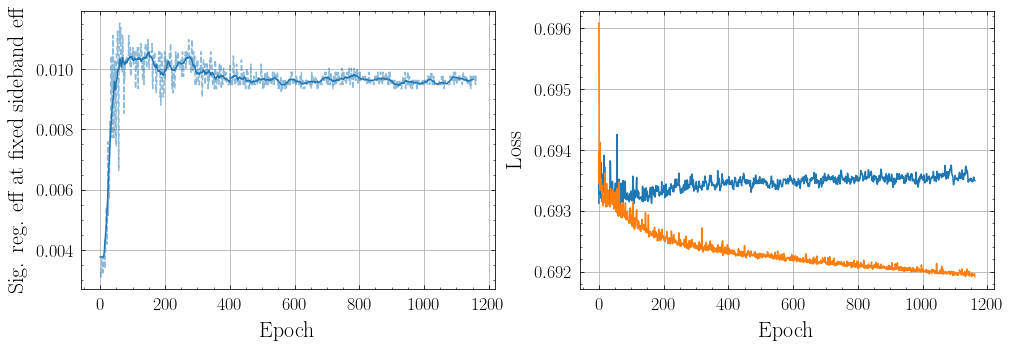

Selected Model:


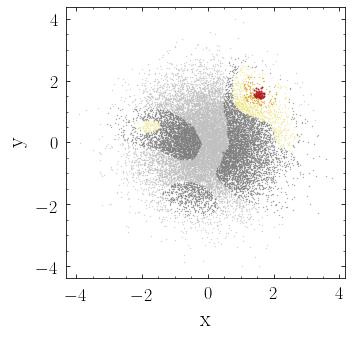

Elapsed Time =  883.4468672275543
Starting lfold 3 of 3
 k = 1 l = 3
Now training model  1  of  1


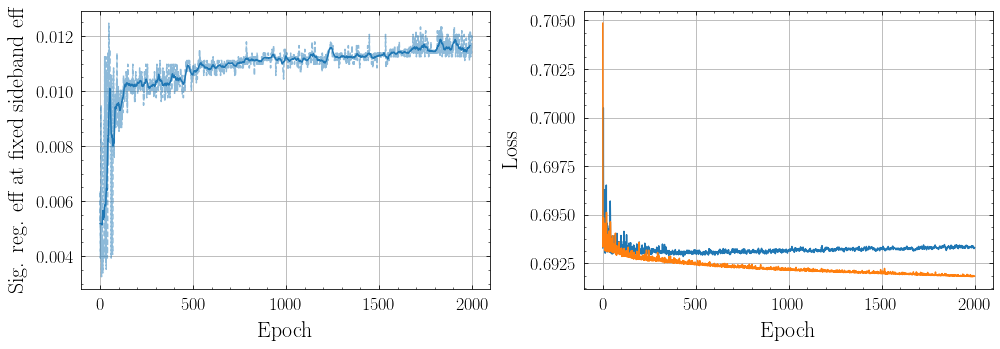

Selected Model:


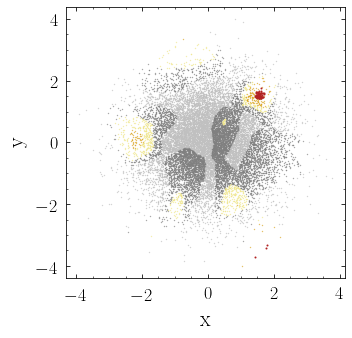

Elapsed Time =  1460.5037558078766
Bin =  16
aucs valid:  [[[0.49759062832966355], [0.5092372197037183], [0.5024462595642738]], [[0.4978245776320114], [0.5045222005552139], [0.5027345782477016]], [[], [], []], [[], [], []]]
Effs valid:  [[[0.010567673756943452], [0.011111111111111072], [0.010974122747595128]], [[0.008808781677734134], [0.010162601626016232], [0.011380571738246803]], [[], [], []], [[], [], []]]
aucs train:  [[[0.5216236706290478], [0.5103357343437414], [0.5131551664137881]], [[0.5258483353206725], [0.5129525219556385], [0.5225723636454763]], [[], [], []], [[], [], []]]
Effs train:  [[[0.010636135763159693], [0.010432190760059634], [0.010839374026149984]], [[0.009958674886525354], [0.00995934959349598], [0.010908598143505643]], [[], [], []], [[], [], []]]


Ensemble model for k = 1


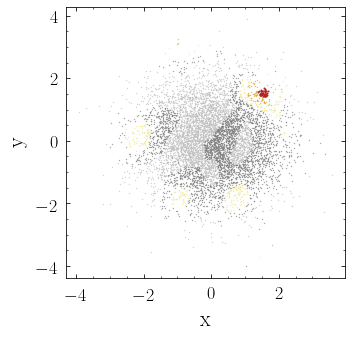

Starting kfold 2 of 3
Starting lfold 0 of 3
 k = 2 l = 0
Now training model  1  of  1


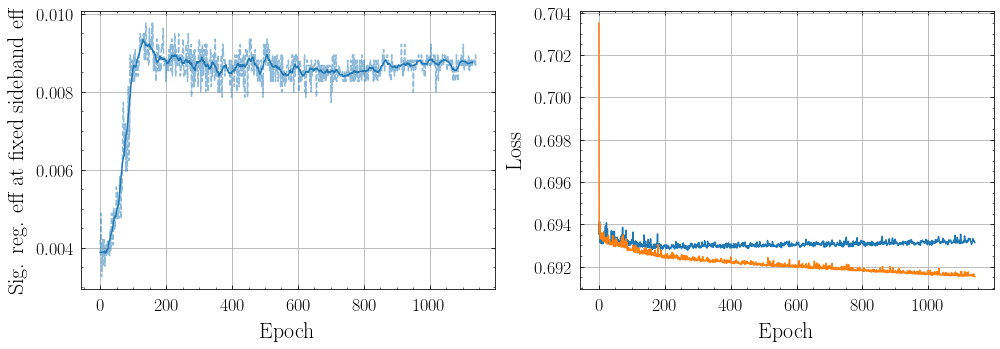

Selected Model:


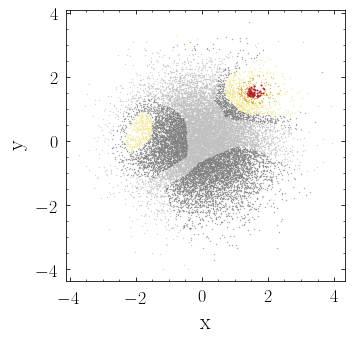

Elapsed Time =  479.6973834037781
Starting lfold 1 of 3
 k = 2 l = 1
Now training model  1  of  1


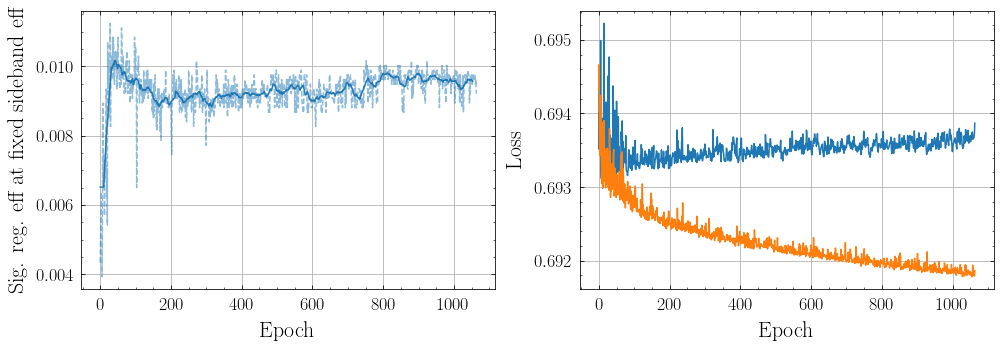

Selected Model:


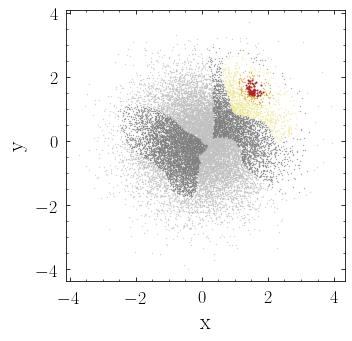

Elapsed Time =  466.7174656391144
Starting lfold 3 of 3
 k = 2 l = 3
Now training model  1  of  1


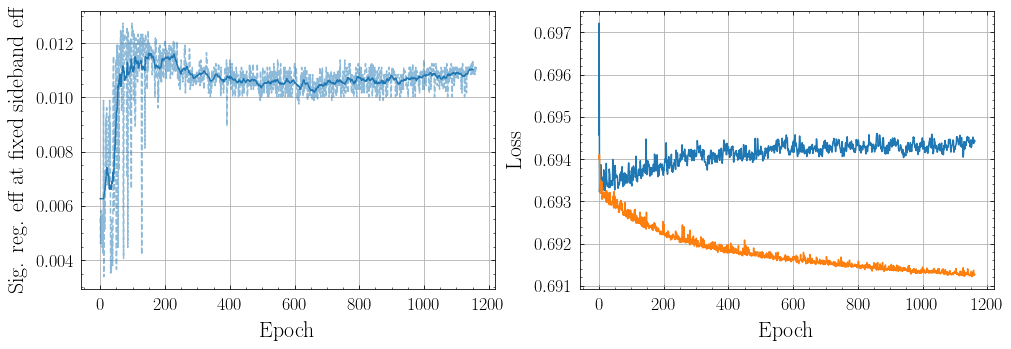

Selected Model:


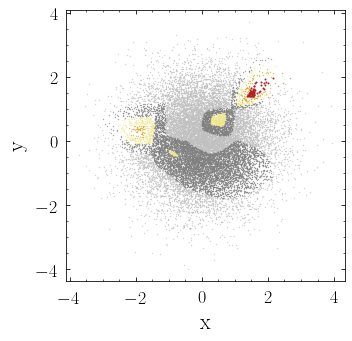

Elapsed Time =  456.25861620903015
Bin =  16
aucs valid:  [[[0.49759062832966355], [0.5092372197037183], [0.5024462595642738]], [[0.4978245776320114], [0.5045222005552139], [0.5027345782477016]], [[0.5023057976971453], [0.5037157395832194], [0.4999388276434008]], [[], [], []]]
Effs valid:  [[[0.010567673756943452], [0.011111111111111072], [0.010974122747595128]], [[0.008808781677734134], [0.010162601626016232], [0.011380571738246803]], [[0.00935086055021006], [0.009754775775640212], [0.012057986722666336]], [[], [], []]]
aucs train:  [[[0.5216236706290478], [0.5103357343437414], [0.5131551664137881]], [[0.5258483353206725], [0.5129525219556385], [0.5225723636454763]], [[0.5128510103944098], [0.5124407014909339], [0.5193852848322298]], [[], [], []]]
Effs train:  [[[0.010636135763159693], [0.010432190760059634], [0.010839374026149984]], [[0.009958674886525354], [0.00995934959349598], [0.010908598143505643]], [[0.010364449261617614], [0.010094850948509482], [0.011043360433604321]], [[], [

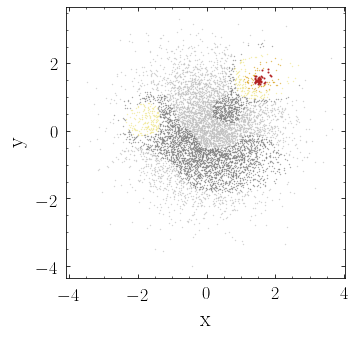

Starting kfold 3 of 3
Starting lfold 0 of 3
 k = 3 l = 0
Now training model  1  of  1


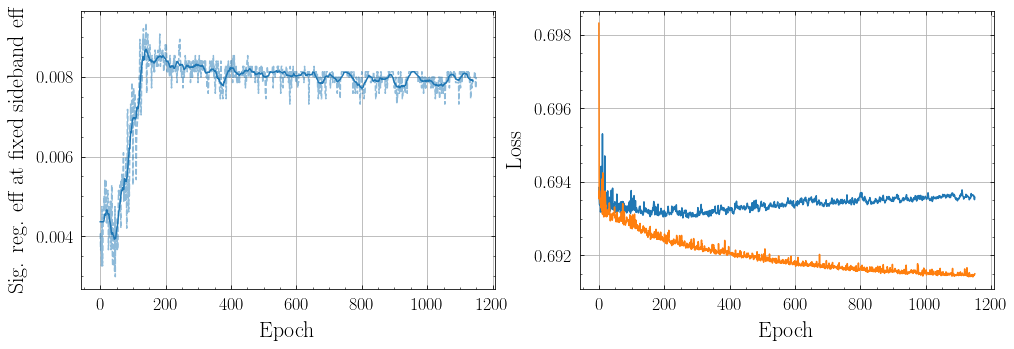

Selected Model:


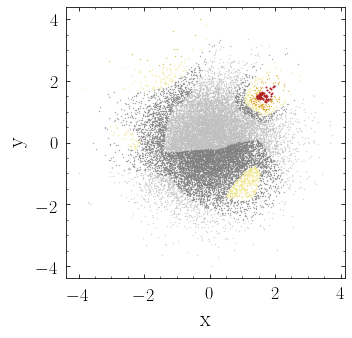

Elapsed Time =  503.1023790836334
Starting lfold 1 of 3
 k = 3 l = 1
Now training model  1  of  1


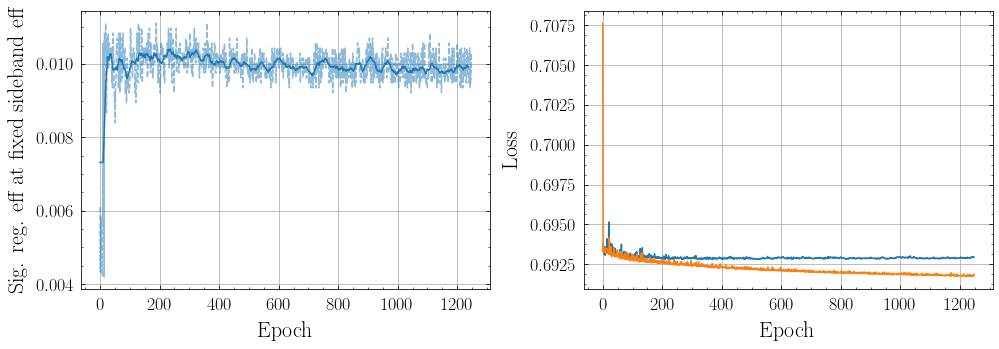

Selected Model:


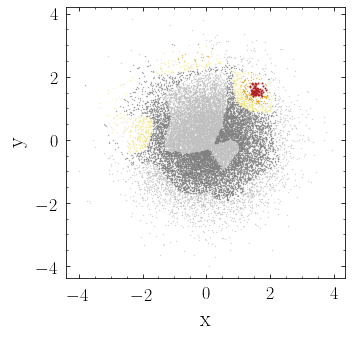

Elapsed Time =  513.4194548130035
Starting lfold 2 of 3
 k = 3 l = 2
Now training model  1  of  1


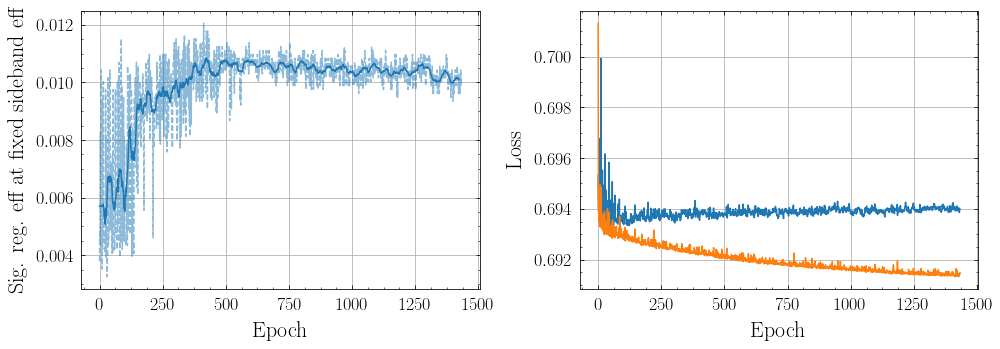

Selected Model:


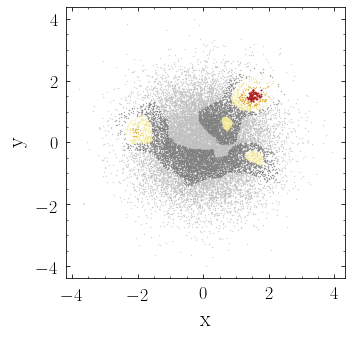

Elapsed Time =  644.7601628303528
Bin =  16
aucs valid:  [[[0.49759062832966355], [0.5092372197037183], [0.5024462595642738]], [[0.4978245776320114], [0.5045222005552139], [0.5027345782477016]], [[0.5023057976971453], [0.5037157395832194], [0.4999388276434008]], [[0.5039601887297209], [0.5091424550958804], [0.49485233286112973]]]
Effs valid:  [[[0.010567673756943452], [0.011111111111111072], [0.010974122747595128]], [[0.008808781677734134], [0.010162601626016232], [0.011380571738246803]], [[0.00935086055021006], [0.009754775775640212], [0.012057986722666336]], [[0.008808781677734134], [0.01083863975071131], [0.011246612466124684]]]
aucs train:  [[[0.5216236706290478], [0.5103357343437414], [0.5131551664137881]], [[0.5258483353206725], [0.5129525219556385], [0.5225723636454763]], [[0.5128510103944098], [0.5124407014909339], [0.5193852848322298]], [[0.5164272643526626], [0.5145646264244491], [0.5193051761644607]]]
Effs train:  [[[0.010636135763159693], [0.010432190760059634], [0.01083937

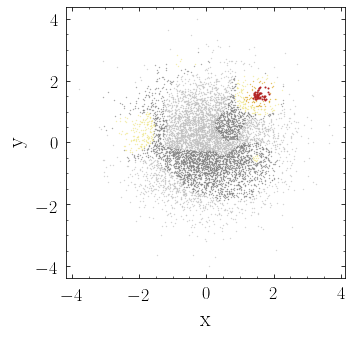

In [16]:
times = list()


model_utils = model_ensemble(bg_plus_signal_binned, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = checkeff)
for k in range(kfolds):
    print('Starting kfold', k, 'of', kfolds-1)
    #Loop over validation sets
    for l in range(kfolds):
        if l == k:
            continue
        print('Starting lfold', l, 'of', kfolds-1)

        data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

        for i in range(ntries):
            print(" k =", k, "l =", l)
            #Naming convention for model files.
            checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
            start = time.time()


            print("Now training model ", i + 1, " of ", ntries)

            K.clear_session()
            #Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
            myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

            #Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
            my_check_eff = check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = patience,
                                     min_epoch=50, batch_size=batch_size,
                                     plot_period=50,eff_rate=checkeff,
                                     plotmode="print",avg_length=20)
            
            #Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
            my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                                axes_list = axes_list,
                                                axes_labels = axes_labels,
                                                period=50,
                                                training_data=np.append(data_train,data_valid,axis=0),
                                                training_labels=np.append(labels_train,labels_valid,axis=0),
                                                preprocess=preprocess,
                                                rates=rates,
                                                colors=colors)

            mycallbacks=[#my_print,
                my_check_eff]

            #Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
            #However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
            model = Sequential()
            model.add(Dense(64, input_dim=numvars,use_bias=True,
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
            model.add(keras.layers.LeakyReLU(alpha=0.01))
            #model.add(Dropout(0.1))
            model.add(Dense(64, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(32, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(16, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(8, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=myoptimizer,
                          loss='binary_crossentropy')

            model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                                   validation_data=(data_valid, labels_valid, weights_valid),
                                   callbacks=mycallbacks,verbose=0,
                                   sample_weight = weights_train)

            del model
            K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


            model = keras.models.load_model(checkpoint_name + "_best.h5")
            model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
            plt.close('all')
            


            print("Selected Model:")
            model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                                        rates=rates,
                                                                        colors=colors)

            for i in range(5):
                gc.collect()
            end = time.time()

            times.append(end-start)
            print("Elapsed Time = ", times[-1])

    print("Bin = ", bin_i)
    print("aucs valid: ", model_utils.aucs_valid)
    print("Effs valid: ", model_utils.effs_valid)
    print("aucs train: ", model_utils.aucs_train)
    print("Effs train: ", model_utils.effs_train)
    print("\n")

    #Make an ensemble model using the average of the best models trained using the (k-1) training-validation splits. Save this as a single model.
    ensemble_model = model_utils.makeandsave_ensemble_model(k,output_prefix + "_" + str(bin_i) + "_ensemble_k" + str(k) + ".h5")
    plt.close('all')
    
    print("Ensemble model for k =", k)
    model_utils.print_scatter_avg_onek_signalplussidebandregion(k,axes_list=axes_list,axes_labels=axes_labels,
                                                                   rates=rates,
                                                                   colors=colors)
    del ensemble_model
    K.clear_session()




Show full cross-validated NN selection

/home/Jack/.virtualenvs/Keras/lib/python3.4/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


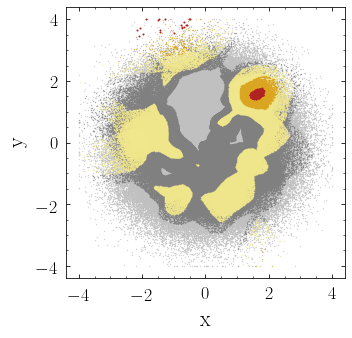

[array([0.5  , 0.9  , 0.99 , 0.999])]

In [22]:
model_utils.load_all_ensemble_models()

kset_data, kset_prediction = model_utils.avg_model_predict_kset()
plt.close('all')

AddPredictionsToScatter_nestedcrossval(kset_data,kset_prediction,
                                       axes_list = axes_list, axes_labels=axes_labels,                                       
                                       rates = np.array([0.5,0.9,0.99,0.999]),
                                    colors=['silver','grey','khaki','goldenrod','firebrick'])

Do p-value calculation

In [18]:
bin_widths_GeV = bin_widths*1000
bin_boundaries_GeV = bin_boundaries*1000

In [19]:
chosen_effs = [1.0,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005]

ymin=1E8
ymax=0
plt.close('all')

file = open(output_prefix + '_' + str(bin_i) +  '_bincounts.dat','w')
bincutcountslist = []

for eff in chosen_effs:
    print("Setting eff to ", eff)
    bincutcounts, bincutcountsset = model_utils.get_bin_cut_counts_all(eff)
    bindensities = bincutcounts / bin_widths_GeV
    print("Counts after cut: ", bincutcounts)
    #print("St. Dev. after cut: ", binstd)
    file.write(str(eff))
    file.write('\t')
    for entry in bincutcounts:
        file.write(str(entry))
        file.write('\t')
    file.write('\n')
    bincutcountslist.append(bincutcounts)



file.close()

Setting eff to  1.0
Counts after cut:  [147965 125198 106303  90017  76574  64554  54485  45610  38625  32750
  27621  23444  19738  16296  13950  11555   9790   8176   6697   5738
   4840   3989   3259   2678   2256   1921   1594   1297   1087    816
    753    591    508    409    312    261    228    172    142]
Setting eff to  0.1
Counts after cut:  [14800 12396 10611  9113  7643  6510  5481  4504  3847  3202  2782  2358
  1918  1632  1391  1192  1044   813   673   593   477   428   322   251
   221   191   172   135    99    75    64    66    52    40    35    33
    21    18    15]
Setting eff to  0.05
Counts after cut:  [7384 6185 5276 4532 3822 3288 2724 2269 1945 1598 1392 1115  964  769
  691  633  547  455  334  287  227  230  176  127  102  103   87   66
   57   43   30   42   28   18   15   17   12    9    9]
Setting eff to  0.02
Counts after cut:  [2918 2494 2126 1843 1501 1300 1062  898  800  641  557  441  360  323
  290  266  251  216  124  112   87   93   58   47   36

Getting p-value for eff: 1.0
fit params:  [1.31553089 4.6974451  7.08790395]


Goodness:  KstestResult(statistic=0.10831740394815947, pvalue=0.7921610353717473)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 0), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', 0.0), ('x', array([0.02])), ('nfev', 2)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 0), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', 0.0), ('x', array([0.01, 1.  ])), ('nfev', 3)]) 

z =  0.06541239097060542
p0 =  0.4739228293209624


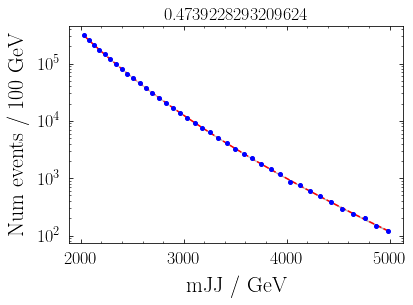

Getting p-value for eff: 0.1
fit params:  [0.12100377 4.57687172 7.12166406]


Goodness:  KstestResult(statistic=0.09550665824254079, pvalue=0.897843663310202)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.31850450084675686), ('x', array([17.00747877])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 7), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -2.0177312332343718), ('x', array([6.50064463e-02, 1.10595101e+02])), ('nfev', 36)]) 

z =  1.8634954840980962
p0 =  0.031196293653800722


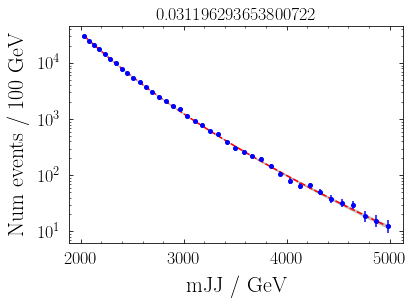

Getting p-value for eff: 0.05
fit params:  [0.03546462 3.7396662  7.33309363]


Goodness:  KstestResult(statistic=0.12377982161865175, pvalue=0.6128896812537967)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -1.5467948174828052), ('x', array([26.20401241])), ('nfev', 12)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 6), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -9.741542737259806), ('x', array([3.92199796e-03, 1.73049511e+02])), ('nfev', 27)]) 

z =  4.077143094178781
p0 =  2.279621827405709e-05


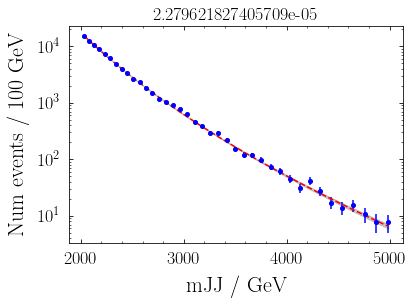

Getting p-value for eff: 0.02
fit params:  [0.05730838 6.20674014 6.80458775]


Goodness:  KstestResult(statistic=0.15398953232789975, pvalue=0.3276856966656405)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -3.41199645979259), ('x', array([24.22597425])), ('nfev', 80)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 9), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -20.679644856974846), ('x', array([6.36975049e-05, 1.61612980e+02])), ('nfev', 42)]) 

z =  5.923941172475124
p0 =  1.5715796441995167e-09


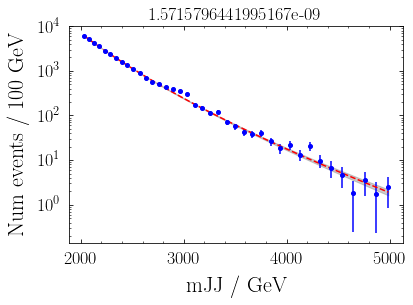

Getting p-value for eff: 0.01
fit params:  [0.02004377 5.64465158 6.94184066]


Goodness:  KstestResult(statistic=0.13524327106683215, pvalue=0.4909746177991714)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -5.9951467410814985), ('x', array([22.3624807])), ('nfev', 10)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 9), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -34.83251886152402), ('x', array([6.58683858e-04, 1.52893342e+02])), ('nfev', 36)]) 

z =  7.6641006833003456
p0 =  8.992806499463768e-15


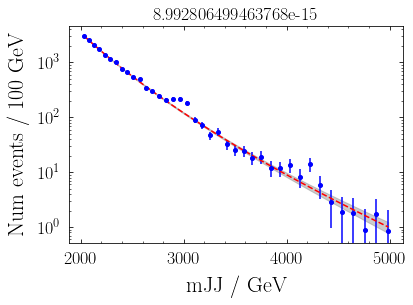

Getting p-value for eff: 0.005
fit params:  [ 0.70445224 12.65810303  5.27336785]


Goodness:  KstestResult(statistic=0.14612297465169516, pvalue=0.390735755552607)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -11.580053989776843), ('x', array([21.64981461])), ('nfev', 10)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 9), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -60.48121334014081), ('x', array([5.06477614e-05, 1.49389438e+02])), ('nfev', 36)]) 

z =  9.996819276779258
p0 =  0.0


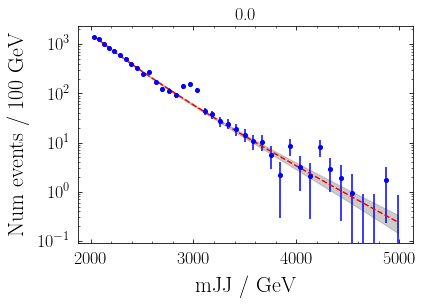

Getting p-value for eff: 0.002
fit params:  [ 0.4117011  14.30357763  5.21920439]


Goodness:  KstestResult(statistic=0.14110239363610239, pvalue=0.4350996340854443)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 2), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-0.31481022])), ('success', True), ('fun', -18.62027267803535), ('x', array([14.09751852])), ('nfev', 6)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 10), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('jac', array([1.13686838e-05, 0.00000000e+00])), ('success', True), ('fun', -83.0135535856324), ('x', array([7.33839498e-05, 1.16449231e+02])), ('nfev', 39)]) 

z =  11.552714336215212
p0 =  0.0


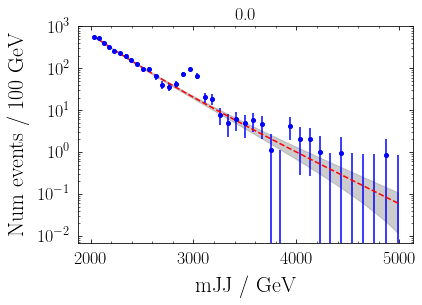

Getting p-value for eff: 0.001
fit params:  [ 0.31307195 14.87435631  5.02527312]


Goodness:  KstestResult(statistic=0.17633105529167925, pvalue=0.1890921919829136)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-0.23053985])), ('success', True), ('fun', -17.287795015466486), ('x', array([10.38417942])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 10), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('jac', array([1.13686838e-05, 1.13686838e-05])), ('success', True), ('fun', -66.67459895424173), ('x', array([5.1583308e-06, 7.8093011e+01])), ('nfev', 36)]) 

z =  10.250073174896325
p0 =  0.0


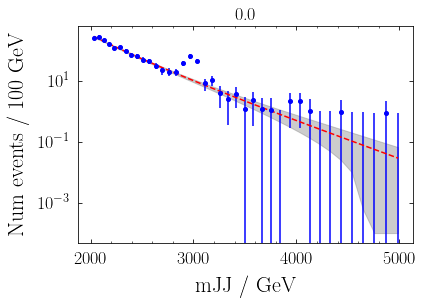

Getting p-value for eff: 0.0005
fit params:  [ 7.51260734 22.05121177  3.57935242]


Goodness:  KstestResult(statistic=0.267508877615471, pvalue=0.009157940898561368)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-0.13896226])), ('success', True), ('fun', -17.919557913169314), ('x', array([8.12563107])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 11), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-5.68434189e-06, -2.84217094e-06])), ('success', True), ('fun', -51.8960183494342), ('x', array([-4.24215012e-06,  5.04203885e+01])), ('nfev', 36)]) 

z =  8.76735641596063
p0 =  0.0


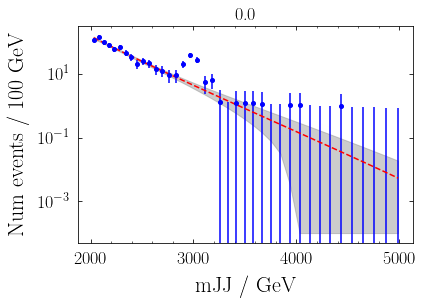

In [23]:
from cwola_utils_copy import get_p_value

for i, eff in enumerate(chosen_effs):
    print("Getting p-value for eff:", eff)

    pplotname = output_prefix + '_pplot_' + str(eff) + '.png'
    get_p_value(bincutcountslist[i],bin_boundaries_GeV,mask=[bin_i-1,bin_i,bin_i+1],verbose=1,
                plotfile="show")

Repeat for bg only

 k = 0 l = 1
Now training model  1  of  1


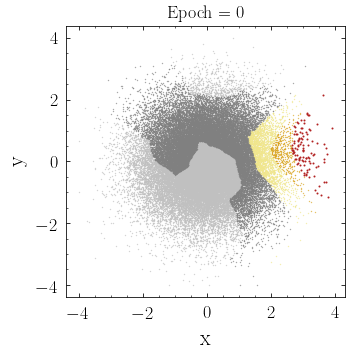

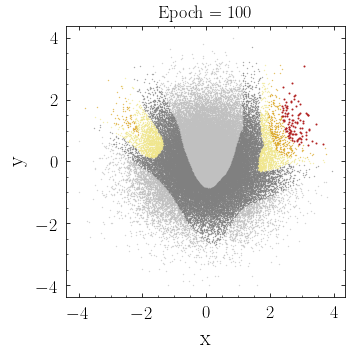

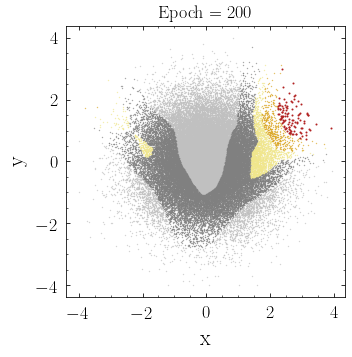

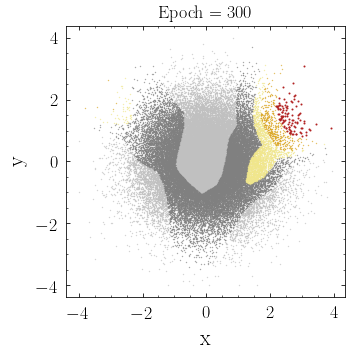

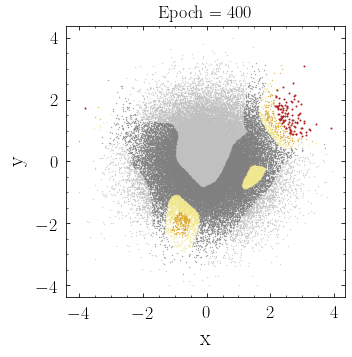

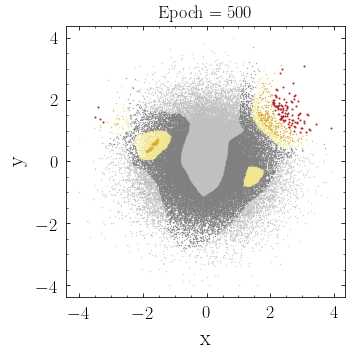

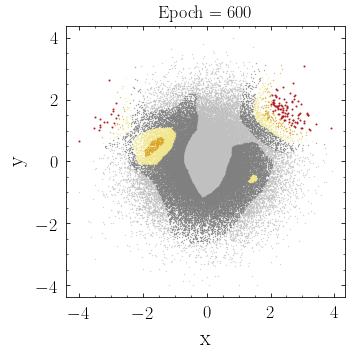

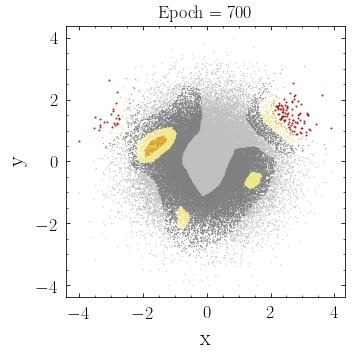

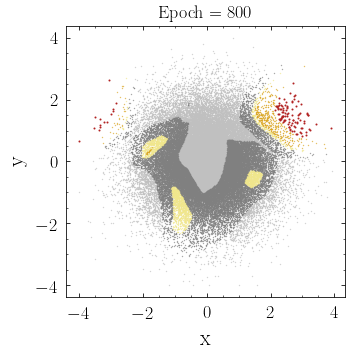

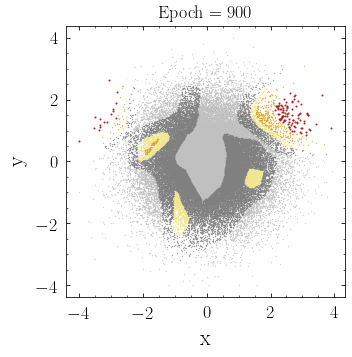

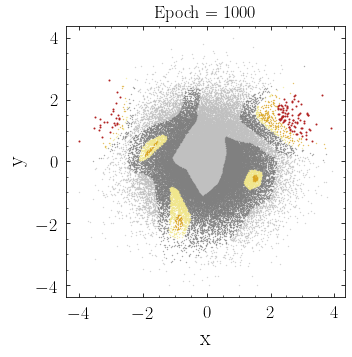

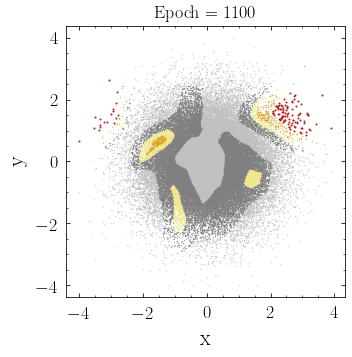

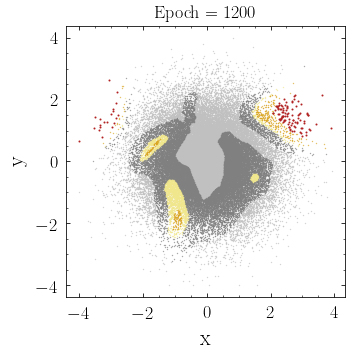

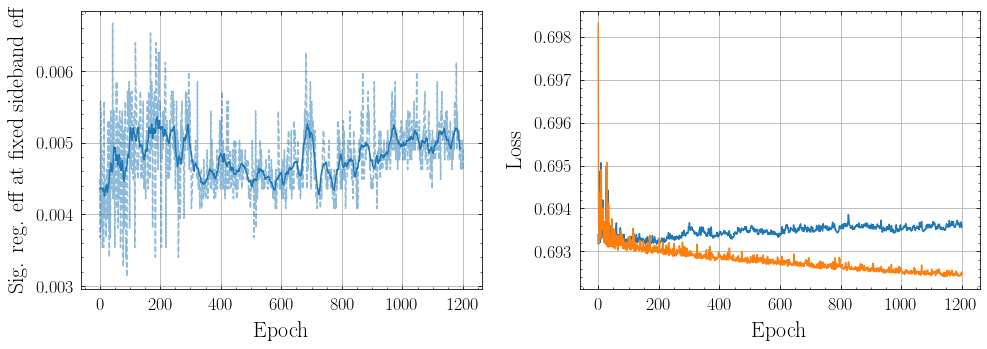

Selected Model:


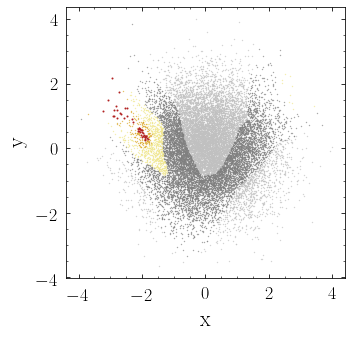

Elapsed Time =  555.1498777866364


In [13]:
times = list()


model_utils = model_ensemble(bgevents, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = checkeff)

i=0
k=0
l=1

print(" k =", k, "l =", l)
#Naming convention for model files.
checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
start = time.time()

data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

print("Now training model ", i + 1, " of ", ntries)

K.clear_session()
#Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

#Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
my_check_eff = check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = patience,
                         min_epoch=50, batch_size=batch_size,
                         plot_period=50,eff_rate = checkeff,
                         plotmode="print",avg_length=20)

#Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                    axes_list = axes_list,
                                    axes_labels = axes_labels,
                                    period=100,
                                    training_data=np.append(data_train,data_valid,axis=0),
                                    training_labels=np.append(labels_train,labels_valid,axis=0),
                                    preprocess=preprocess,
                                   rates=rates,
                                   colors=colors,
                                   mode = "show")

mycallbacks=[my_print,
    my_check_eff]

#Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
#However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
model = Sequential()
model.add(Dense(64, input_dim=numvars,use_bias=True,
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
model.add(keras.layers.LeakyReLU(alpha=0.01))
#model.add(Dropout(0.1))
model.add(Dense(64, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(32, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
#model.add(Dropout(0.1))
model.add(Dense(16, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(8, use_bias=True, activation='elu',
                bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=myoptimizer,
              loss='binary_crossentropy')

model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                       validation_data=(data_valid, labels_valid, weights_valid),
                       callbacks=mycallbacks,verbose=0,
                       sample_weight = weights_train)

del model
K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


model = keras.models.load_model(checkpoint_name + "_best.h5")
model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
plt.close('all')

print("Selected Model:")
model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                            rates=rates,
                                                            colors=colors)

for i in range(5):
    gc.collect()
end = time.time()

times.append(end-start)
print("Elapsed Time = ", times[-1])

Starting kfold 0 of 3
Starting lfold 1 of 3
 k = 0 l = 1
Now training model  1  of  1


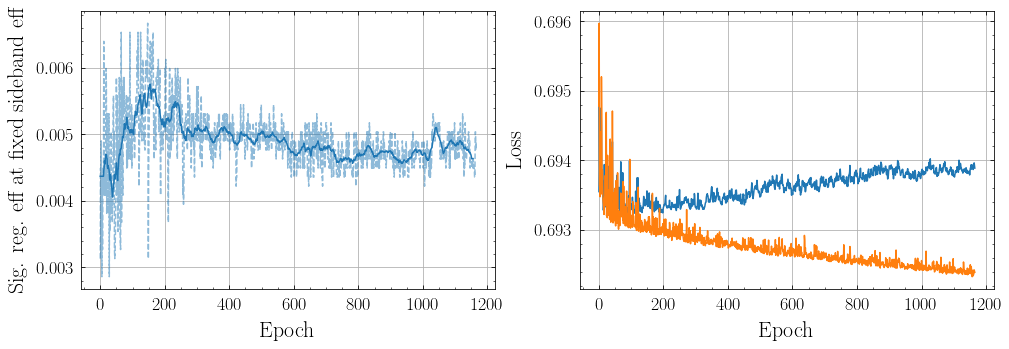

Selected Model:


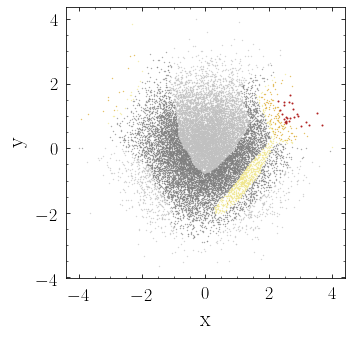

Elapsed Time =  477.81962847709656
Starting lfold 2 of 3
 k = 0 l = 2
Now training model  1  of  1


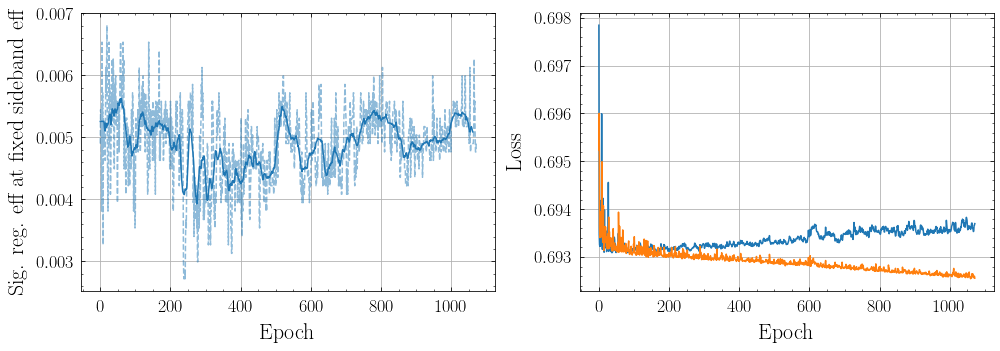

Selected Model:


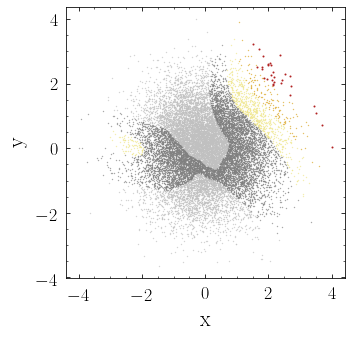

Elapsed Time =  421.939377784729
Starting lfold 3 of 3
 k = 0 l = 3
Now training model  1  of  1


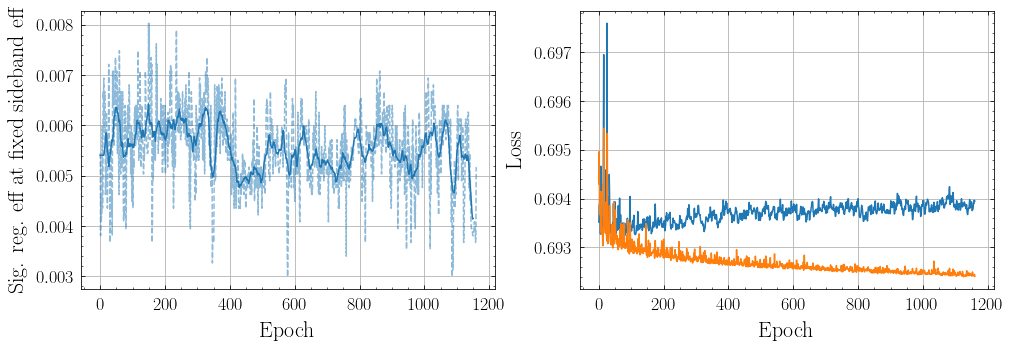

Selected Model:


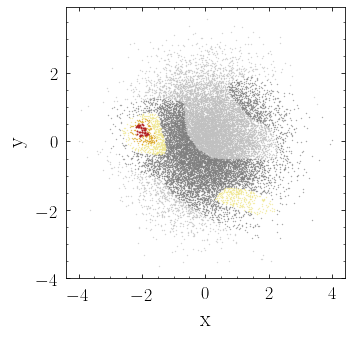

Elapsed Time =  491.1893377304077
Bin =  16
aucs valid:  [[[0.5008829858815789], [0.500666206395321], [0.5021247180908082]], [[], [], []], [[], [], []], [[], [], []]]
Effs valid:  [[[0.005988838981897393], [0.0055812687176695075], [0.008029395753946678]], [[], [], []], [[], [], []], [[], [], []]]
aucs train:  [[[0.5117120899741177], [0.5063435110335603], [0.5120247154433404]], [[], [], []], [[], [], []], [[], [], []]]
Effs train:  [[[0.006056893970328048], [0.005444028581150007], [0.0060573062002313716]], [[], [], []], [[], [], []], [[], [], []]]


Ensemble model for k = 0


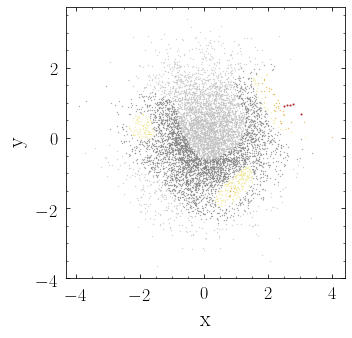

Starting kfold 1 of 3
Starting lfold 0 of 3
 k = 1 l = 0
Now training model  1  of  1


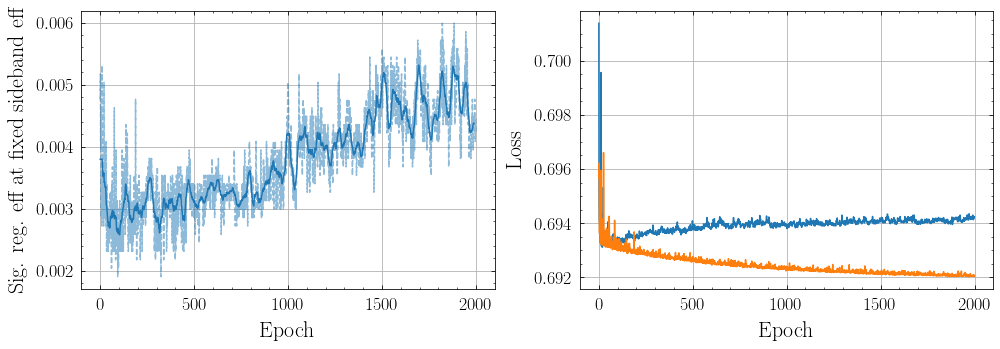

Selected Model:


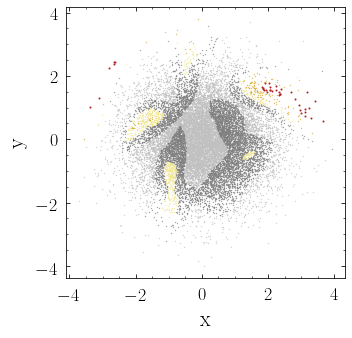

Elapsed Time =  831.5171277523041
Starting lfold 2 of 3
 k = 1 l = 2
Now training model  1  of  1


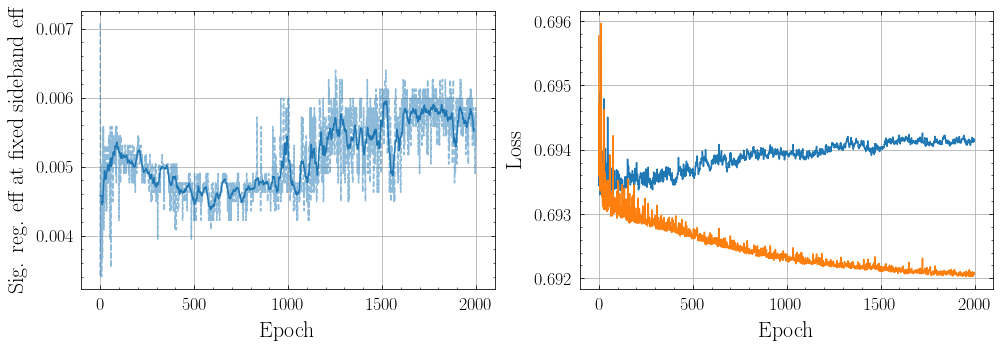

Selected Model:


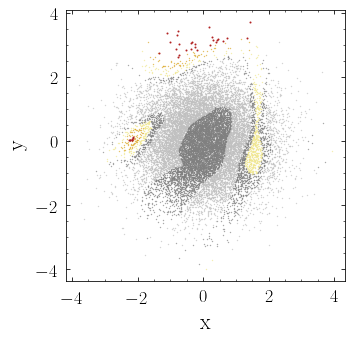

Elapsed Time =  911.7959094047546
Starting lfold 3 of 3
 k = 1 l = 3
Now training model  1  of  1


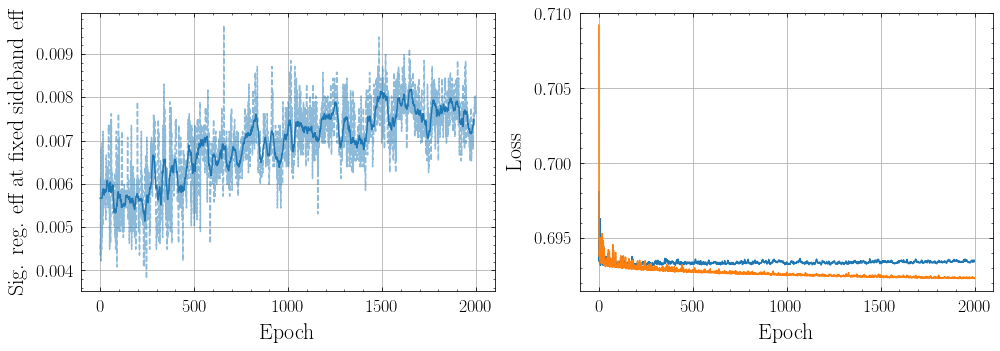

Selected Model:


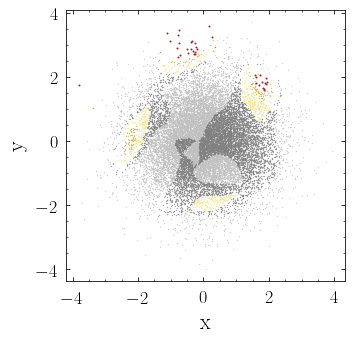

Elapsed Time =  889.2112746238708
Bin =  16
aucs valid:  [[[0.5008829858815789], [0.500666206395321], [0.5021247180908082]], [[0.498312332017233], [0.4926468525340899], [0.5038164219792762]], [[], [], []], [[], [], []]]
Effs valid:  [[[0.005988838981897393], [0.0055812687176695075], [0.008029395753946678]], [[0.0053090117070514475], [0.006125782738905516], [0.008165487207403399]], [[], [], []], [[], [], []]]
aucs train:  [[[0.5117120899741177], [0.5063435110335603], [0.5120247154433404]], [[0.5234909988202313], [0.5207862165623167], [0.517388107857174]], [[], [], []], [[], [], []]]
Effs train:  [[[0.006056893970328048], [0.005444028581150007], [0.0060573062002313716]], [[0.006465223900911976], [0.005988838981897393], [0.00762319629730468]], [[], [], []], [[], [], []]]


Ensemble model for k = 1


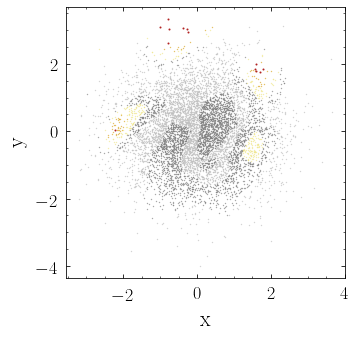

Starting kfold 2 of 3
Starting lfold 0 of 3
 k = 2 l = 0
Now training model  1  of  1


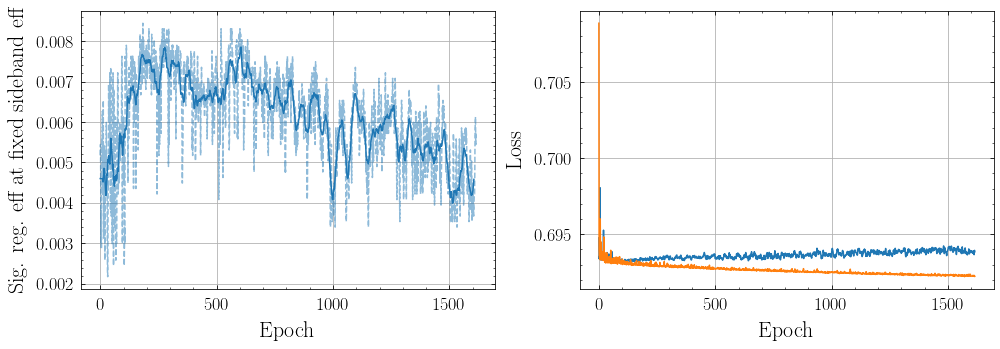

Selected Model:


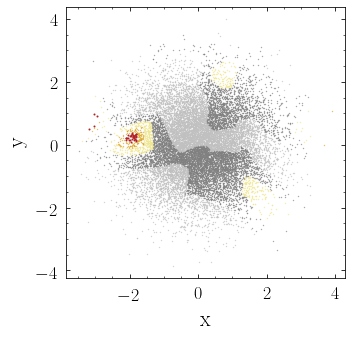

Elapsed Time =  656.764285326004
Starting lfold 1 of 3
 k = 2 l = 1
Now training model  1  of  1


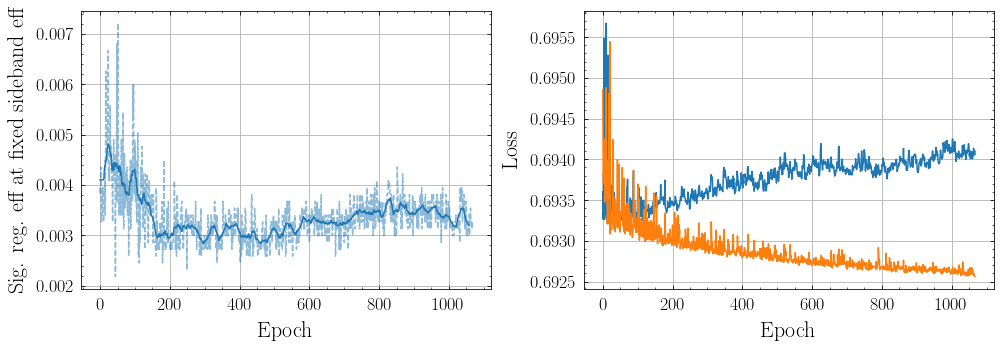

Selected Model:


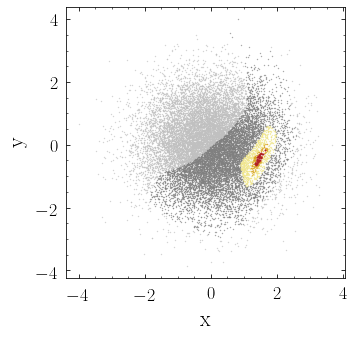

Elapsed Time =  427.2816512584686
Starting lfold 3 of 3
 k = 2 l = 3
Now training model  1  of  1


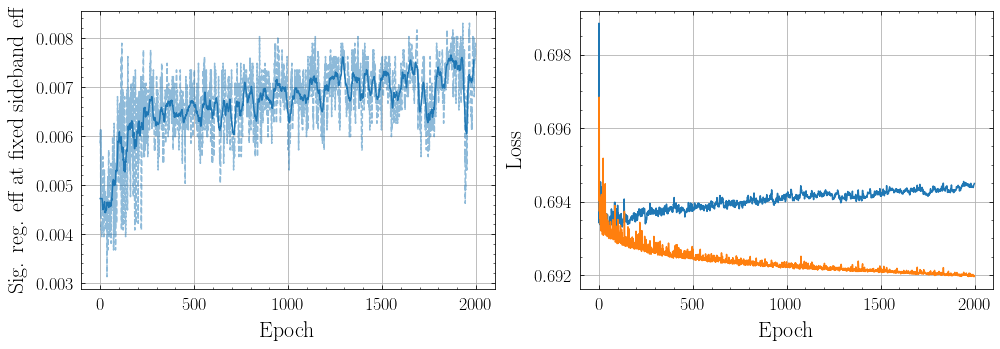

Selected Model:


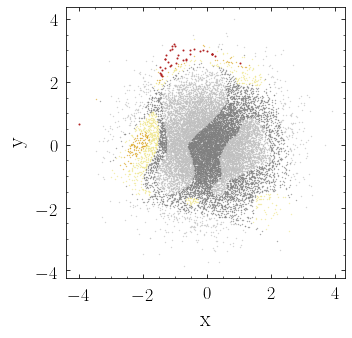

Elapsed Time =  866.626100063324
Bin =  16
aucs valid:  [[[0.5008829858815789], [0.500666206395321], [0.5021247180908082]], [[0.498312332017233], [0.4926468525340899], [0.5038164219792762]], [[0.4971538803516595], [0.4974395961416528], [0.49559850850195925]], [[], [], []]]
Effs valid:  [[[0.005988838981897393], [0.0055812687176695075], [0.008029395753946678]], [[0.0053090117070514475], [0.006125782738905516], [0.008165487207403399]], [[0.008167710318540689], [0.0039471893289778626], [0.007485029940119792]], [[], [], []]]
aucs train:  [[[0.5117120899741177], [0.5063435110335603], [0.5120247154433404]], [[0.5234909988202313], [0.5207862165623167], [0.517388107857174]], [[0.5128582052668731], [0.5067324020945702], [0.5218908829576299]], [[], [], []]]
Effs train:  [[[0.006056893970328048], [0.005444028581150007], [0.0060573062002313716]], [[0.006465223900911976], [0.005988838981897393], [0.00762319629730468]], [[0.0073494385845526145], [0.00421940928270037], [0.0072143197440958096]], [[], 

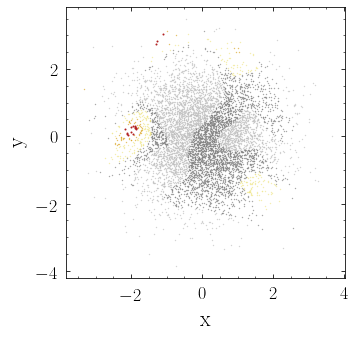

Starting kfold 3 of 3
Starting lfold 0 of 3
 k = 3 l = 0
Now training model  1  of  1


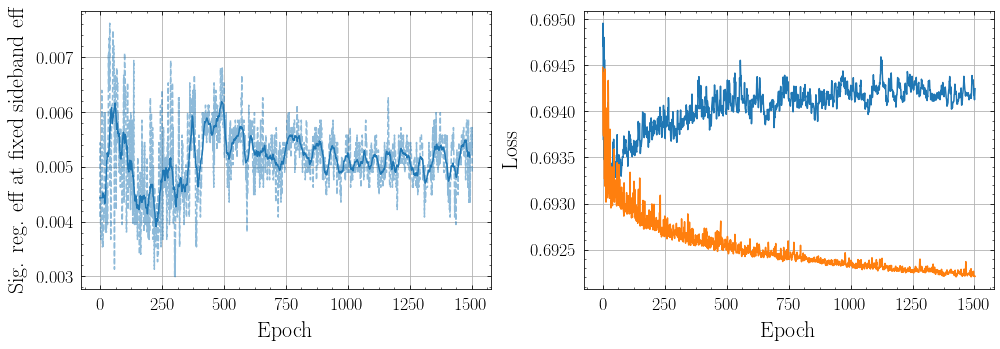

Selected Model:


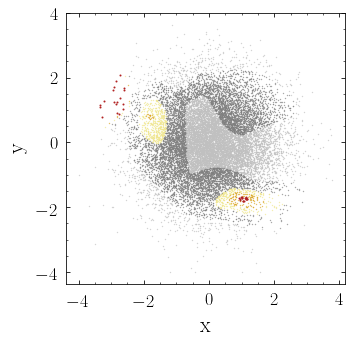

Elapsed Time =  635.1587393283844
Starting lfold 1 of 3
 k = 3 l = 1
Now training model  1  of  1


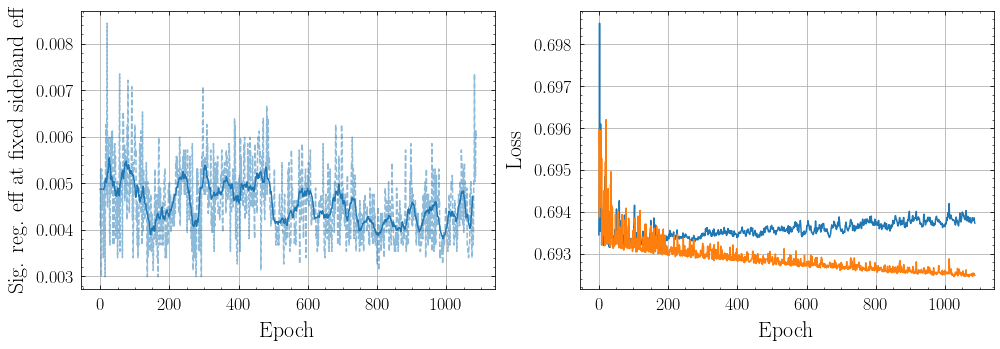

Selected Model:


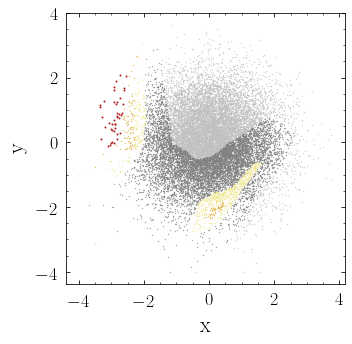

Elapsed Time =  500.3849151134491
Starting lfold 2 of 3
 k = 3 l = 2
Now training model  1  of  1


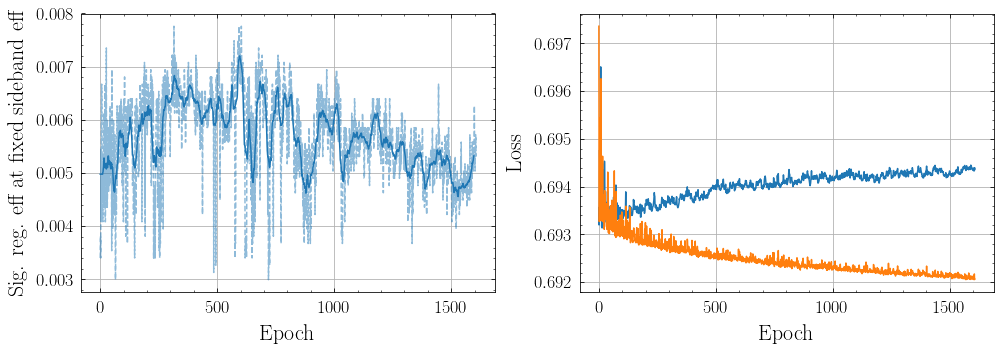

Selected Model:


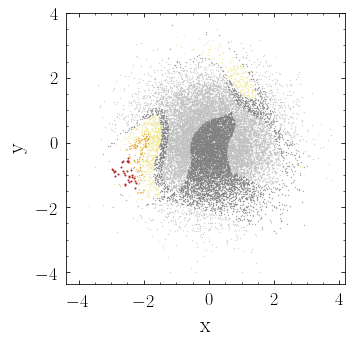

Elapsed Time =  617.9195685386658
Bin =  16
aucs valid:  [[[0.5008829858815789], [0.500666206395321], [0.5021247180908082]], [[0.498312332017233], [0.4926468525340899], [0.5038164219792762]], [[0.4971538803516595], [0.4974395961416528], [0.49559850850195925]], [[0.492188342626194], [0.5023778733231451], [0.49410844380930574]]]
Effs valid:  [[[0.005988838981897393], [0.0055812687176695075], [0.008029395753946678]], [[0.0053090117070514475], [0.006125782738905516], [0.008165487207403399]], [[0.008167710318540689], [0.0039471893289778626], [0.007485029940119792]], [[0.006261911244214491], [0.004899959167006918], [0.00735093928668662]]]
aucs train:  [[[0.5117120899741177], [0.5063435110335603], [0.5120247154433404]], [[0.5234909988202313], [0.5207862165623167], [0.517388107857174]], [[0.5128582052668731], [0.5067324020945702], [0.5218908829576299]], [[0.5159260691814745], [0.509109980599933], [0.5186521055110694]]]
Effs train:  [[[0.006056893970328048], [0.005444028581150007], [0.006057306

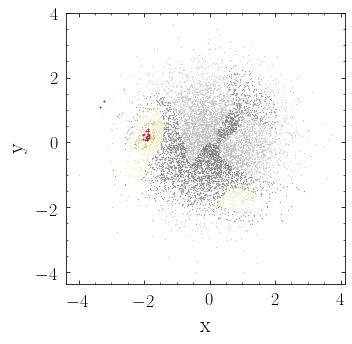

In [24]:
times = list()


model_utils = model_ensemble(bgevents, bin_i = bin_i, kfolds=kfolds, eff_for_thresh = checkeff)
for k in range(kfolds):
    print('Starting kfold', k, 'of', kfolds-1)
    #Loop over validation sets
    for l in range(kfolds):
        if l == k:
            continue
        print('Starting lfold', l, 'of', kfolds-1)

        data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = model_utils.get_trainval_data(k,l)

        for i in range(ntries):
            print(" k =", k, "l =", l)
            #Naming convention for model files.
            checkpoint_name = output_prefix + "_" + str(bin_i) + "_[" + str(k) + "," + str(l) + "]_" + str(i)
            start = time.time()


            print("Now training model ", i + 1, " of ", ntries)

            K.clear_session()
            #Following hyperparams seem to work well. Not done systematic optimization. Maybe something else works much better.
            myoptimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.8, beta_2=0.99, epsilon=1e-08, decay=0.0005)

            #Custom callback to record tpr at fixed fpr (set by eff_rate), where tpr and fpr refer to signal and sideband regions rather than truth-labels.
            my_check_eff = check_eff(verbose=0, filename = checkpoint_name + '_best.h5', patience = patience,
                                     min_epoch=50, batch_size=batch_size,
                                     plot_period=50,eff_rate=checkeff,
                                     plotmode="print",avg_length=20)
            
            #Custom callback for printing scatter plots every few epochs. Useful for troubleshooting, but slows down training considerably.
            my_print = print_scatter_checkpoint(filename = checkpoint_name,
                                                axes_list = axes_list,
                                                axes_labels = axes_labels,
                                                period=50,
                                                training_data=np.append(data_train,data_valid,axis=0),
                                                training_labels=np.append(labels_train,labels_valid,axis=0),
                                                preprocess=preprocess,
                                                rates=rates,
                                                colors=colors)

            mycallbacks=[#my_print,
                my_check_eff]

            #Following seems to work well for benchmarks. Not systematically optimized. I basically just played around until something worked.
            #However, bias initialization seems very important. Keras relu by default initializes to 0 bias, and especially in the first layer will not move from that initialization during training. This is very suboptimal.
            model = Sequential()
            model.add(Dense(64, input_dim=numvars,use_bias=True,
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5)))
            model.add(keras.layers.LeakyReLU(alpha=0.01))
            #model.add(Dropout(0.1))
            model.add(Dense(64, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(32, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            #model.add(Dropout(0.1))
            model.add(Dense(16, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(8, use_bias=True, activation='elu',
                            bias_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.2)))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=myoptimizer,
                          loss='binary_crossentropy')

            model_hist = model.fit(data_train, labels_train, epochs=2000, batch_size=batch_size,
                                   validation_data=(data_valid, labels_valid, weights_valid),
                                   callbacks=mycallbacks,verbose=0,
                                   sample_weight = weights_train)

            del model
            K.clear_session()           #Otherwise TensorFlow eats up all GPU memory with previous models.


            model = keras.models.load_model(checkpoint_name + "_best.h5")
            model_utils.add_model(model, None, k, l,checkpoint_name + "_best.h5")
            plt.close('all')
            


            print("Selected Model:")
            model_utils.print_scatter_onemodel_signalplussidebandregion(k,l,i,axes_list=axes_list,axes_labels=axes_labels,
                                                                        rates=rates,
                                                                        colors=colors)

            for i in range(5):
                gc.collect()
            end = time.time()

            times.append(end-start)
            print("Elapsed Time = ", times[-1])

    print("Bin = ", bin_i)
    print("aucs valid: ", model_utils.aucs_valid)
    print("Effs valid: ", model_utils.effs_valid)
    print("aucs train: ", model_utils.aucs_train)
    print("Effs train: ", model_utils.effs_train)
    print("\n")

    #Make an ensemble model using the average of the best models trained using the (k-1) training-validation splits. Save this as a single model.
    ensemble_model = model_utils.makeandsave_ensemble_model(k,output_prefix + "_" + str(bin_i) + "_ensemble_k" + str(k) + ".h5")
    plt.close('all')
    
    print("Ensemble model for k =", k)
    model_utils.print_scatter_avg_onek_signalplussidebandregion(k,axes_list=axes_list,axes_labels=axes_labels,
                                                                   rates=rates,
                                                                   colors=colors)
    del ensemble_model
    K.clear_session()




/home/Jack/.virtualenvs/Keras/lib/python3.4/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


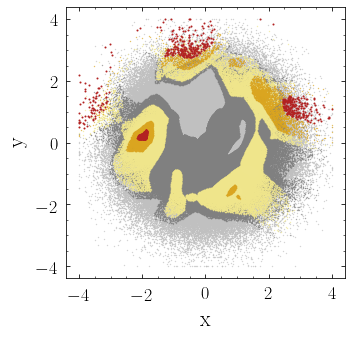

[array([0.5  , 0.9  , 0.99 , 0.999])]

In [25]:
model_utils.load_all_ensemble_models()

kset_data, kset_prediction = model_utils.avg_model_predict_kset()
plt.close('all')

AddPredictionsToScatter_nestedcrossval(kset_data,kset_prediction,
                                       axes_list = axes_list, axes_labels=axes_labels,                                       
                                       rates = np.array([0.5,0.9,0.99,0.999]),
                                    colors=['silver','grey','khaki','goldenrod','firebrick'])

Do p-value calculation

In [26]:
bin_widths_GeV = bin_widths*1000
bin_boundaries_GeV = bin_boundaries*1000

In [27]:
chosen_effs = [1.0,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005]

ymin=1E8
ymax=0
plt.close('all')

file = open(output_prefix + '_' + str(bin_i) +  '_bincounts.dat','w')
bincutcountslist = []

for eff in chosen_effs:
    print("Setting eff to ", eff)
    bincutcounts, bincutcountsset = model_utils.get_bin_cut_counts_all(eff)
    bindensities = bincutcounts / bin_widths_GeV
    print("Counts after cut: ", bincutcounts)
    #print("St. Dev. after cut: ", binstd)
    file.write(str(eff))
    file.write('\t')
    for entry in bincutcounts:
        file.write(str(entry))
        file.write('\t')
    file.write('\n')
    bincutcountslist.append(bincutcounts)



file.close()

Setting eff to  1.0
Counts after cut:  [147966 125198 106303  90017  76573  64554  54485  45610  38625  32750
  27621  23444  19738  16297  13942  11522   9732   8133   6690   5737
   4840   3989   3259   2678   2256   1921   1594   1297   1087    816
    753    591    508    409    312    261    228    172    142]
Setting eff to  0.1
Counts after cut:  [14761 12447 10773  8979  7635  6527  5434  4547  3877  3268  2726  2378
  2003  1648  1349  1128   995   751   673   586   504   395   317   264
   216   201   155   133   104    78    73    70    50    41    36    26
    27    11    18]
Setting eff to  0.05
Counts after cut:  [7304 6265 5490 4491 3809 3247 2651 2302 1944 1665 1303 1127 1048  841
  672  560  479  399  345  283  259  204  163  126  119   96   74   67
   47   45   39   33   24   19   15   13   17    6   10]
Setting eff to  0.02
Counts after cut:  [2945 2491 2176 1831 1564 1336 1054  887  754  671  550  447  418  341
  241  224  177  160  143  100  111   82   58   50   44

Getting p-value for eff: 1.0
fit params:  [1.3133879  4.69570658 7.08863636]


Goodness:  KstestResult(statistic=0.10871360503245342, pvalue=0.7967210994182921)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 0), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', 0.0), ('x', array([0.02])), ('nfev', 2)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 0), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', 0.0), ('x', array([0.01, 1.  ])), ('nfev', 3)]) 

z =  nan
p0 =  nan


/home/Jack/.virtualenvs/Keras/ML_4_bump/CWoLa-Hunting/code/cwola_utils_copy.py:1023: RuntimeWarning: invalid value encountered in sqrt
  Zval = np.sqrt(2*(neglognum - neglogden))


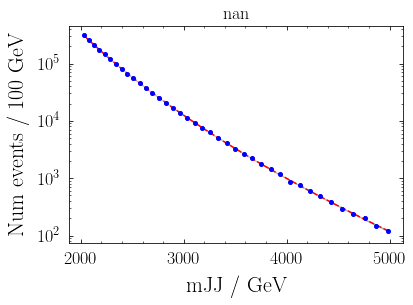

Getting p-value for eff: 0.1
fit params:  [0.14442384 4.83637055 7.0501273 ]


Goodness:  KstestResult(statistic=0.1145946339042265, pvalue=0.722020414273624)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 5), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.15311323579589953), ('x', array([-11.83381061])), ('nfev', 18)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 8), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -1.0196108822201495), ('x', array([  0.07782668, -76.06596748])), ('nfev', 39)]) 

z =  0
p0 =  0.5


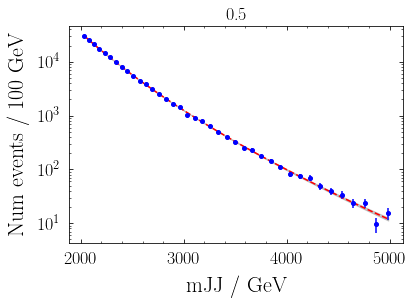

Getting p-value for eff: 0.05
fit params:  [0.06051466 4.56442984 7.12090003]


Goodness:  KstestResult(statistic=0.12704545738506567, pvalue=0.5764926915851807)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.06337779963359935), ('x', array([-5.35925669])), ('nfev', 18)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 7), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('jac', array([0.       , 0.0001819])), ('success', True), ('fun', -0.4330823376585613), ('x', array([ 1.61265539e-02, -3.44678270e+01])), ('nfev', 60)]) 

z =  0
p0 =  0.5


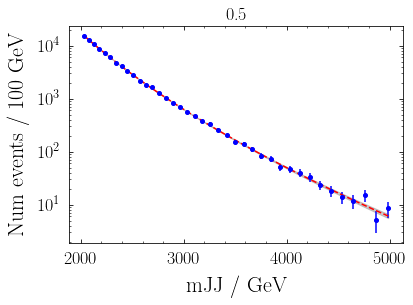

Getting p-value for eff: 0.02
fit params:  [0.05798725 6.21175768 6.80353602]


Goodness:  KstestResult(statistic=0.08552831511848746, pvalue=0.9548910220358178)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.03301809260574373), ('x', array([-2.41141847])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 8), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -0.2382926310719995), ('x', array([ 1.06983346e-04, -1.54986704e+01])), ('nfev', 72)]) 

z =  0
p0 =  0.5


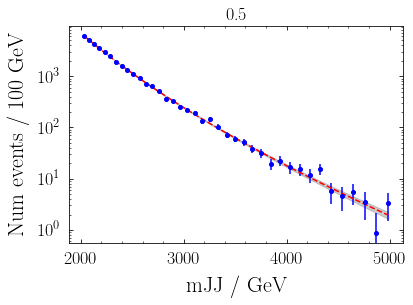

Getting p-value for eff: 0.01
fit params:  [0.1845721  9.21164926 6.0752394 ]


Goodness:  KstestResult(statistic=0.13712825521918548, pvalue=0.47251729982423196)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('jac', array([2.27373675e-05])), ('success', True), ('fun', -0.0027149878251293558), ('x', array([0.51707768])), ('nfev', 12)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 9), ('message', b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'), ('jac', array([2.27373675e-05, 2.27373675e-05])), ('success', True), ('fun', -0.008835473463477683), ('x', array([-6.09605470e-04,  3.28214902e+00])), ('nfev', 51)]) 

z =  0.17659158040325412
p0 =  0.42991460400566384


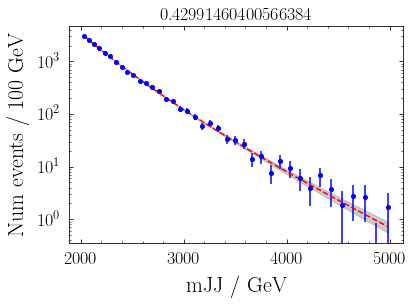

Getting p-value for eff: 0.005
fit params:  [0.1102138  9.60735469 6.01737038]


Goodness:  KstestResult(statistic=0.1078027139265923, pvalue=0.7969261986200032)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.03229116979025548), ('x', array([-1.20311755])), ('nfev', 10)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 7), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -0.25112334818970794), ('x', array([-4.62162981e-05, -7.39248639e+00])), ('nfev', 27)]) 

z =  0
p0 =  0.5


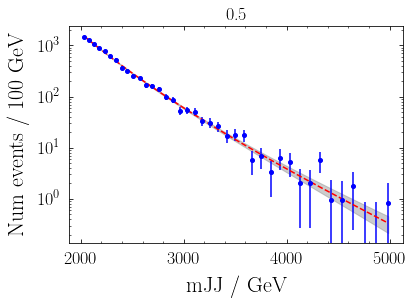

Getting p-value for eff: 0.002
fit params:  [ 0.48960188 14.96618213  5.22794617]


Goodness:  KstestResult(statistic=0.13504979120905267, pvalue=0.4928948728221556)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-5.68434189e-06])), ('success', True), ('fun', -0.07873444831901111), ('x', array([1.20057754])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 7), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0., 0.])), ('success', True), ('fun', -0.31009532352115343), ('x', array([1.58659619e-05, 6.69812148e+00])), ('nfev', 24)]) 

z =  0.8417741521661617
p0 =  0.19995719137191958


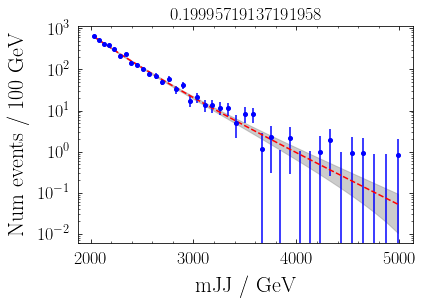

Getting p-value for eff: 0.001
fit params:  [ 4.86092546 19.33552588  3.99860873]


Goodness:  KstestResult(statistic=0.1779119102883629, pvalue=0.18136535277462618)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 3), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.006084041962282072), ('x', array([0.27255987])), ('nfev', 8)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([-1.42108547e-06, -7.10542736e-07])), ('success', True), ('fun', -0.001986017936353335), ('x', array([-5.98394635e-06,  1.33553070e+00])), ('nfev', 18)]) 

z =  0.23270530158304947
p0 =  0.40799512607809985


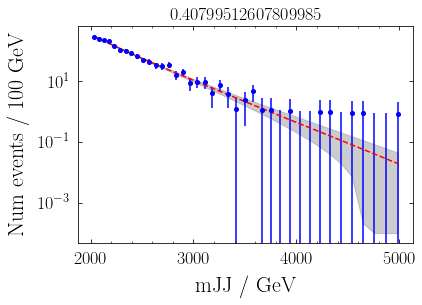

Getting p-value for eff: 0.0005
fit params:  [ 0.7312237  17.00860788  4.4171494 ]


Goodness:  KstestResult(statistic=0.17768235494410198, pvalue=0.18247168865644614)


numerator:  dict_items([('status', 0), ('hess_inv', <1x1 LbfgsInvHessProduct with dtype=float64>), ('nit', 4), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([0.])), ('success', True), ('fun', -0.06828050922276319), ('x', array([0.6538676])), ('nfev', 10)]) 

Denominator:  dict_items([('status', 0), ('hess_inv', <2x2 LbfgsInvHessProduct with dtype=float64>), ('nit', 7), ('message', b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'), ('jac', array([3.55271368e-07, 0.00000000e+00])), ('success', True), ('fun', -0.12398988256581944), ('x', array([2.16062939e-06, 2.92001394e+00])), ('nfev', 24)]) 

z =  0.6802920084545472
p0 =  0.24815979182705927


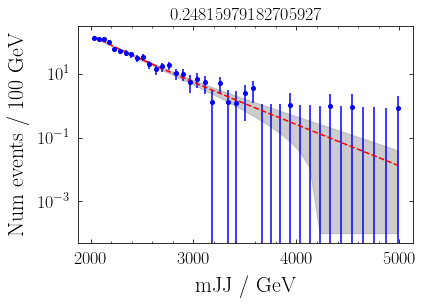

In [28]:
from cwola_utils_copy import get_p_value

for i, eff in enumerate(chosen_effs):
    print("Getting p-value for eff:", eff)

    pplotname = output_prefix + '_pplot_' + str(eff) + '.png'
    get_p_value(bincutcountslist[i],bin_boundaries_GeV,mask=[bin_i-1,bin_i,bin_i+1],verbose=1,
                plotfile="show")